In [4]:
import pandas as pd

In [57]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

In [320]:
import matplotlib.ticker as ticker

In [6]:
import datetime as dt

In [375]:
# time series
from statsmodels.tsa.seasonal import seasonal_decompose

In [376]:
from darts import TimeSeries
from darts.models import ExponentialSmoothing

In [307]:
data = pd.read_csv("gemini_BTCUSD_day.csv")

In [308]:
data = data[::-1]

In [309]:
data.head()

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
2293,1.444277e+09,08/10/2015 04:00,BTCUSD,0.00,245.00,0.00,243.60,34.754703
2292,1.444363e+09,09/10/2015 04:00,BTCUSD,243.60,249.97,243.60,245.51,61.587068
2291,1.444450e+09,10/10/2015 04:00,BTCUSD,245.51,246.30,244.60,246.30,30.870549
2290,1.444536e+09,11/10/2015 04:00,BTCUSD,246.30,249.50,245.96,248.98,22.747091
2289,1.444622e+09,12/10/2015 04:00,BTCUSD,248.98,248.98,245.75,245.75,71.047743


In [310]:
data.tail()

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
4,1.642050e+12,13/01/2022 04:00,BTCUSD,43525.85,44443.94,42326.63,42679.68,1120.790154
3,1.642130e+12,14/01/2022 04:00,BTCUSD,42679.68,43462.53,41789.82,42947.72,800.802511
2,1.642220e+12,15/01/2022 04:00,BTCUSD,42947.72,43811.44,42590.52,43022.38,850.111677
1,1.642310e+12,16/01/2022 04:00,BTCUSD,43022.38,43499.99,42583.00,42655.12,622.078099
0,1.642390e+12,17/01/2022 04:00,BTCUSD,42655.12,42976.61,41559.11,42236.96,556.178715


In [311]:
data_close = data['Close']

In [312]:
data_close = data_close.values.reshape(len(data_close), 1)

In [330]:
data_date = [None] * len(data['Date'])
for index, i in enumerate(data['Date']):
   data_date[index] = i[6:10] + i[3:5] + i[0:2]



In [365]:
ticker_spacing = data_date
ticker_spacing = 90 # 3 month

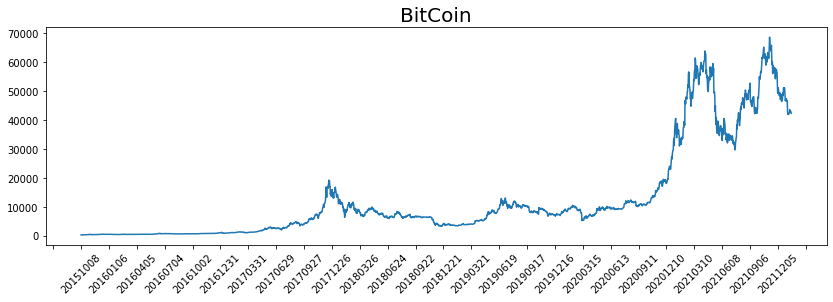

In [362]:
fig, ax = plt.subplots(1,1)
ax.plot(data_date,data_close)
ax.xaxis.set_major_locator(ticker.MultipleLocator(ticker_spacing))
plt.rcParams["figure.figsize"] = (14,4)
plt.xticks(rotation = 45)
plt.title("BitCoin", fontsize=20)
plt.show()

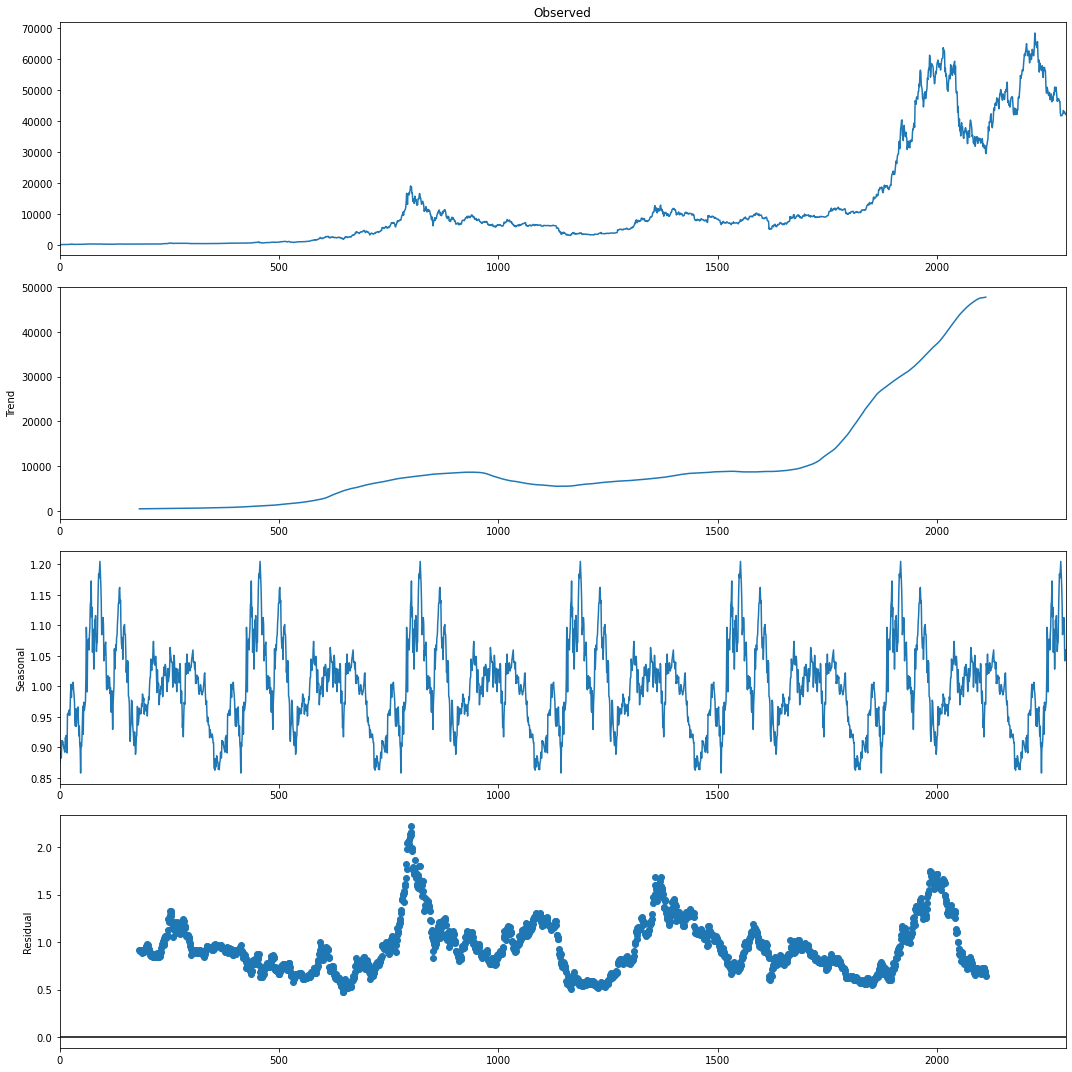

In [363]:
# multiplicative Decomposition: yt = St x Tt x Et*
forecast = seasonal_decompose(data['Close'].values, 'multiplicative', period=365)
plt.rcParams.update({'figure.figsize': (15,15)})
forecast.plot()
plt.show()